#SVM Kernel Simoide: Hiperpárametros

Durante el proceso de ajuste de hiperparámetros del modelo SVM con kernel sigmoidal, se enfrentó un desafío técnico al realizar la búsqueda de hiperparámetros en R. Aunque R es un lenguaje robusto para la ciencia de datos, en este caso, la búsqueda de parámetros como C y gamma a través de validación cruzada resultó ser muy costosa en términos de recursos. A medida que aumentaba el número de combinaciones de parámetros y el tamaño del conjunto de datos, el proceso se volvió extremadamente lento, llegando a esperar hasta 3 horas por resultados sin obtener éxito. En muchos casos, el sistema colapsaba debido a la gran demanda de memoria y procesamiento, lo que hacía que la operación fuera insostenible.

Este inconveniente fue causado por la falta de optimización de R en cuanto a la paralelización de tareas y la gestión de memoria al realizar búsquedas exhaustivas de hiperparámetros. R no logró manejar de manera eficiente la carga computacional derivada de la validación cruzada con múltiples combinaciones de parámetros, lo que resultó en un tiempo de espera largo y un sistema inestable. Esto demostró que R no era la mejor opción en este caso específico, dado que la operación estaba limitando el progreso del análisis.

Por lo tanto, se decidió cambiar a Python, conocido por su eficiencia y capacidad de manejar grandes volúmenes de datos y operaciones paralelizadas. Python, con bibliotecas como scikit-learn y joblib, permite la distribución de tareas entre múltiples núcleos de procesamiento, lo que optimiza significativamente el tiempo de cálculo. Gracias a estas capacidades de optimización, la búsqueda de hiperparámetros se completó con éxito y en tiempos mucho más cortos, permitiendo obtener los mejores parámetros para el modelo de manera estable y sin colapsos en el sistema. Esto hizo que Python fuera la opción ideal para realizar la tarea de manera eficiente y escalable.

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Reaplicamos el código debido al reinicio del entorno
import pandas as pd

In [4]:
 #Cargar el archivo proporcionado
file_path_svm = '/content/data_vars_imputadas.csv'
data = pd.read_csv(file_path_svm)

# Revisar las primeras filas del archivo para comprender su estructura.
data.head()


,accelX.g.,accelY.g.,accelZ.g.,accelUserX.g.,accelUserY.g.,accelUserZ.g.,gyroX.rad.s.,gyroY.rad.s.,gyroZ.rad.s.,Roll.rads.,...,m21,m22,m23,m31,m32,m33,ActivityType,Pressure.kilopascals.,RelativeAltitude.meters.,herzios
0,0.0437,-0.6249,-0.7299,0.0137,0.0009,0.0580,0.0985,0.0902,-0.0039,0.0347,...,0.0192,0.7765,0.6298,0.0191,-0.6301,0.7763,Coche_autopista,97.0946,-0.214,2
1,0.0405,-0.6357,-0.7556,0.0119,-0.0026,0.0242,-0.0539,0.0716,-0.1416,0.0338,...,-0.6470,-0.4310,0.6290,0.5044,0.3766,0.7770,Coche_autopista,97.0946,-0.214,2
2,-0.1734,-0.3077,-0.0805,-0.1732,0.3564,0.6277,-0.1249,0.0633,-0.0210,-0.0090,...,-0.6179,-0.4362,0.6542,0.5396,0.3700,0.7563,Coche_autopista,97.0946,-0.214,2
3,0.1984,-0.4168,-1.0315,-0.0111,0.1551,-0.2601,-1.0331,1.0555,-1.2428,0.3746,...,-0.8710,-0.3166,0.3755,0.2034,0.4633,0.8625,Coche_autopista,97.0946,-0.214,2
4,-0.0991,-0.6518,-0.8322,-0.1217,-0.2809,0.0910,0.4942,0.2636,-1.5661,0.0522,...,-0.8851,-0.2762,0.3746,0.3416,0.1612,0.9259,Coche_autopista,97.0946,-0.214,2


In [5]:

# Separar las características y la variable objetivo
X = data.drop(columns=['ActivityType'])
y = data['ActivityType']

# Codificar la variable objetivo (ActivityType)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizar las características
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Definir el modelo SVM con kernel sigmoidal
svm_model = SVC(kernel='sigmoid')

# Definir los parámetros a probar en GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced']

}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)



Mejores parámetros: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1}


In [11]:
# Mostrar el mejor score (accuracy) obtenido en la búsqueda de hiperparámetros
best_accuracy = grid_search.best_score_
print("Mejor accuracy obtenido en la búsqueda de hiperparámetros:", best_accuracy)

Mejor accuracy obtenido en la búsqueda de hiperparámetros: 0.9998528690534576


In [6]:
# Evaluar el modelo con los mejores parámetros encontrados
best_svm_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_svm_model.predict(X_test)

# Mostrar el reporte de clasificación y la matriz de confusión
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix


('                 precision    recall  f1-score   support\n\n        Andando       1.00      1.00      1.00       978\n        Autobus       1.00      1.00      1.00       569\n          Avion       1.00      1.00      1.00       153\n      Bicicleta       1.00      1.00      1.00       585\nCoche_autopista       1.00      1.00      1.00       343\n   Coche_urbano       1.00      1.00      1.00      2471\n\n       accuracy                           1.00      5099\n      macro avg       1.00      1.00      1.00      5099\n   weighted avg       1.00      1.00      1.00      5099\n',
 array([[ 978,    0,    0,    0,    0,    0],
        [   0,  569,    0,    0,    0,    0],
        [   0,    0,  153,    0,    0,    0],
        [   0,    0,    0,  585,    0,    0],
        [   0,    0,    0,    0,  343,    0],
        [   0,    0,    0,    0,    0, 2471]]))

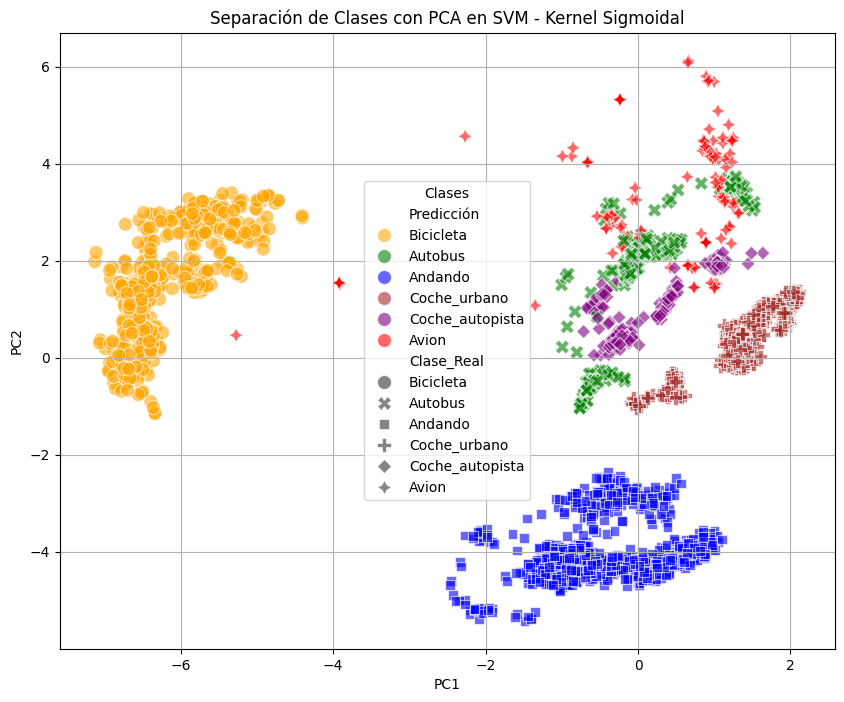

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Predecir en el conjunto de prueba
y_pred = best_svm_model.predict(X_test)

# Crear un dataframe con los resultados del PCA y las predicciones del modelo
pca_data = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Predicción': label_encoder.inverse_transform(y_pred),  # Convertimos las predicciones a etiquetas originales
    'Clase_Real': label_encoder.inverse_transform(y_test)  # Convertimos las clases reales a etiquetas originales
})

# Definir un diccionario con colores personalizados
custom_palette = {
    'Andando': 'blue',
    'Autobus': 'green',
    'Avion': 'red',  # Ajustamos el color de "Avión" a rojo para hacerlo más visible
    'Bicicleta': 'orange',
    'Coche_autopista': 'purple',
    'Coche_urbano': 'brown'
}

# Graficar la separación de clases usando PCA con la paleta personalizada
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='Predicción', style='Clase_Real', palette=custom_palette, s=100, alpha=0.6)

# Ajustar título y etiquetas
plt.title("Separación de Clases con PCA en SVM - Kernel Sigmoidal")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clases")
plt.grid(True)
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Evaluar el accuracy en el conjunto de entrenamiento
y_train_pred = best_svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en los datos de entrenamiento: {accuracy_train}")

# Evaluar el accuracy en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy en los datos de prueba: {accuracy_test}")

# Comparar la diferencia en accuracy entre entrenamiento y prueba
if accuracy_train > accuracy_test:
    print("El modelo podría estar sobreajustando (overfitting).")

# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Accuracy promedio con validación cruzada en entrenamiento: {cv_scores.mean()}")

# Mostrar el reporte de clasificación y la matriz de confusión
print("\nReporte de clasificación en prueba:")
print(report)

# Mostrar la matriz de confusión
print("\nMatriz de confusión:")
print(conf_matrix)

Accuracy en los datos de entrenamiento: 1.0
Accuracy en los datos de prueba: 1.0
Accuracy promedio con validación cruzada en entrenamiento: 0.9998528690534576

Reporte de clasificación en prueba:
                 precision    recall  f1-score   support

        Andando       1.00      1.00      1.00       978
        Autobus       1.00      1.00      1.00       569
          Avion       1.00      1.00      1.00       153
      Bicicleta       1.00      1.00      1.00       585
Coche_autopista       1.00      1.00      1.00       343
   Coche_urbano       1.00      1.00      1.00      2471

       accuracy                           1.00      5099
      macro avg       1.00      1.00      1.00      5099
   weighted avg       1.00      1.00      1.00      5099


Matriz de confusión:
[[ 978    0    0    0    0    0]
 [   0  569    0    0    0    0]
 [   0    0  153    0    0    0]
 [   0    0    0  585    0    0]
 [   0    0    0    0  343    0]
 [   0    0    0    0    0 2471]]
